# Principal Component Analysis Project Notebook

PCA is a dimensionality reduction technique; it lets you distill multi-dimensional data down to fewer dimensions, selecting new dimensions that preserve variance in the data as best it can.

We Will See How To Implement it in this python notebook with the diffrent way: With Numpy and With Sklearn library But First Let's Take a Look How PCA Work Under the hood.

The Purpose from this project is to write and algorithm that can solve the given task and then calculate the time complexity of it.

![alt-text](https://lh4.googleusercontent.com/uIpCrBHdp5l8czaW1W14jMSuYCWopr1U5iFXhQiR06aKDSvM0oKVfRDZTnkcNa74BtCLJYhxToN49B-qYbi5=w1366-h657)

## PCA Approach 

1. Standardize the data.
- Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix, or perform Singular Vector   Decomposition.
- Sort eigenvalues in descending order and choose the $k$ eigenvectors that correspond to the $k$ largest eigenvalues where $k$ is the number of dimensions of the new feature subspace $(k≤d)$.
- Construct the projection matrix $W$ from the selected $k$ eigenvectors.
- Transform the original dataset $X$ via $W$ to obtain a $k$-dimensional feature subspace $Y$.

![](https://lh3.googleusercontent.com/Wl4l1qdCLjRuCYW7ykESGQHJnbjOKmRJUGaRaItE4NJTOau28h3LZ2DZtxHhNzAh7TH1IwfBo-ufYg=w1366-h657)


### 1. Standardizing The Data

Most of the times, our dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations, this is a problem.

If left alone, these algorithms only take in the magnitude of features neglecting the units. The results would vary greatly between different units, 5kg and 5000gms. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.

Whether to standardize the data prior to a PCA on the covariance matrix depends on the measurement scales of the original features. Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales.

<img src = "https://cdn-images-1.medium.com/max/1600/1*EyPd0sQxEXtTDSJgu72JNQ.jpeg" title ="Tiny Features vs Mega Features"/>

### 2. Computing Eigenvectors and Eigenvalues

The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the "core" of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

#### Covariance Matrix

The classic approach to PCA is to perform the eigendecomposition on the covariance matrix $Σ$, which is a $n×n$ matrix where each element represents the covariance between two features. The covariance between two features can be calculated like the following:

$\sigma_{jk}=\frac{1}{n−1}\sum_{i = 1}^N = (x_{ij}−\bar{x_{j}})(x_{ik}−\bar{x_{k}})$.

We can summarize the calculation of the covariance matrix via the following matrix equation:
$\sum_=\frac{1}{n−1}((X−\bar{x})^T(X−\bar{x}))$

where $\bar{x}$ is the mean vector $\bar{x}=\sum_{i = 1}^n x_{i}.$

The mean vector is a d-dimensional vector where each value in this vector represents the sample mean of a feature column in the dataset.


#### EigenValues and EigenVectors

![](https://lh6.googleusercontent.com/a_qZqt7sGy-MNWX3RA6KPVw07jLti8aQbOhH6ExpncPivCa4T8NYOYSJSW21dJ4QtHHh1XIAyJOB2VqKjCqg=w1366-h657)


In essence, an eigenvector v of a linear transformation T is a non-zero vector that, when T is applied to it, does not change direction. Applying T to the eigenvector only scales the eigenvector by the scalar value λ, called an eigenvalue. This condition can be written as the equation ${\displaystyle T(\mathbf {v} )=\lambda \mathbf {v} ,} $ then the eigenvalue equation above for a linear transformation can be rewritten as the matrix multiplication ${\displaystyle Av=\lambda v} $

then v is an eigenvector of the linear transformation A and the scale factor λ is the eigenvalue corresponding to that eigenvector. Equation is the eigenvalue equation for the matrix A. Equation  can be stated equivalently as ${\displaystyle (A-\lambda I)v=0}$ where I is the n by n identity matrix.

Equation has a non-zero solution $v$ if and only if the determinant of the matrix $(A − λI)$ is zero. Therefore, the eigenvalues of $A$ are values of $λ$ that satisfy the equation ${\displaystyle |A-\lambda I|=0}$

### 3. Sort eigenvalues
The typical goal of a PCA is to reduce the dimensionality of the original feature space by projecting it onto a smaller subspace, where the eigenvectors will form the axes.

In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.
In order to do so, the common approach is to rank the eigenvalues from highest to lowest in order choose the top $k$ eigenvectors.

### 4. Construct the projection matrix

It's about time to get to the really interesting part: The construction of the projection matrix that will be used to transform the dataset onto the new feature subspace. Although, the name "projection matrix" has a nice ring to it, it is basically just a matrix of our concatenated top $k$ eigenvectors.

### 5.  Transform the original dataset

In this last step we will use the $d*k$-dimensional projection matrix $W$ to transform our samples onto the new subspace via the equation
$Y=X×W$, where $Y$ is matrix of our transformed samples.

![](https://lh6.googleusercontent.com/Eu6DsFxTSvHDhEsOxEtVCeyBcolVPkj-d0CdObbCbLZ4FskCuAZVzlAdI7_Ex74-7f1gE1vmA7raSMgO627w=w1366-h657)

# PCA Using Numpy

In [23]:
# Importing The Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# getting the data from csv file
data = pd.read_csv('Wine.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [25]:
# Spliting Them to Features and targets
X = data.iloc[:, 0:13].values
y = data.iloc[:, 13].values

In [26]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [27]:
# Calculating Covariance Matrix
cov_matrix = np.cov(X.T)

In [28]:
# Getting the Eign Values And EigenVecorts
# Since We Know That The Matrix is Symetric we can use eigh instead of eig for better performance
eig_vals, eig_vecs = np.linalg.eigh(cov_matrix)

![](https://lh3.googleusercontent.com/E0ZSBXQDog66ik2kBkx9zsQhLlG_ZMVAaGc0l_pSuURL_c-OePX5bGsDMmF-YG5EIb1iiOiqxztbSA=w1366-h657)

In [29]:
# Forming a pair of Eign Values / Pairs
eig_pairs = [(np.abs(eig_vals[i]) , eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sorting All of Them
eig_pairs.sort(key = lambda x : x[0] , reverse= True)

In [30]:
# we do not need this one at all
final = [eig_pairs[i][1].reshape(X.shape[1],1) for i in range(2)] 

# Creating the Projection Matrix, multiplying by -identity is an addons
projection_matrix = np.hstack((final))

In [31]:
# Transforming The Data
Y = X.dot(projection_matrix)
#n =-1 * np.identity(2)
#Y = Y.dot(n)

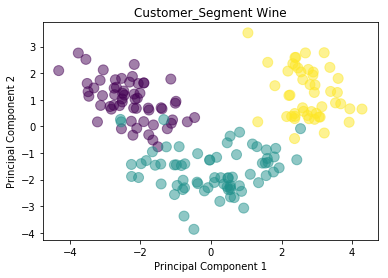

In [32]:
# Ploting The Data
plt.scatter(Y[:,0], Y[:,1], c = y,s = 100, alpha = 0.5)
plt.title('Customer_Segment Wine')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# PCA Using Sklearn
For Testing Purposes We have test the Data on The PCA implemented by Sklearn Library, and the result was the same in some terms

In [33]:
# Getting The PCA From sklearn library
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
New = pca.fit_transform(X)

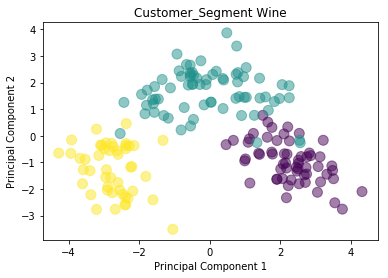

In [34]:
# Ploting The Data For Sklearn Result
plt.scatter(New[:,0], New[:,1], c = y,s = 100, alpha = 0.5)
plt.title('Customer_Segment Wine')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Time Complexity
The Purpose From This Project was to calculate the time complexity of our algorithm, we had calculate it and we found it $\mathcal{O}(nm^2 + m^3)$ , if we make $m = n$ we get $\mathcal{O}(n^3)$ which belong to the polynomial Class.


![](https://lh4.googleusercontent.com/2-2a_jTAlLLKyOkqWkyNybEgGQmD7LX6wC07IPOGzhOpha1fCGWkQ7u1yXXYIcqtJvxrgdZczTVBig=w1366-h657)

What we did in test is to use the same number for n and m, i.e the number of columns equals the number of rows which is not often in real world dataset.


![](https://lh5.googleusercontent.com/VVKMoTw_jUAVaDF2scW3l8qkuYfwVAVE3GEhUyTaYUR3TTHNyxoQPz7vT9dHETPv4Gzd5blKXyLszQ=w1366-h657)


Finally I want to mention that we were able to use Singular Value Decomposition as another solution to the Eigen Decomposition, most of PCA implementation use SVD to improve the computational efficiency. the next cell describe how we coud calculate the svd from a given matrix using numpy

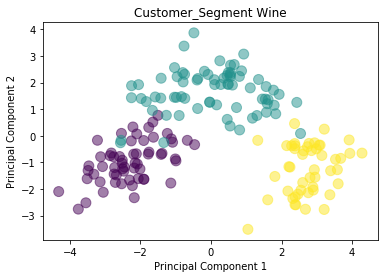

In [35]:
#Getting the sub matrices from the X matrix
u , s , v = np.linalg.svd(X.T)

# and now u respresent the projection  matrix in our case
Y = X.dot(u)

# Ploting the Result
plt.scatter(Y[:,0], Y[:,1], c = y,s = 100, alpha = 0.5)
plt.title('Customer_Segment Wine')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

And As we can see the result are pretty awsome and equal to our algorithm result, but in time complexity terms they are not.

![](https://lh5.googleusercontent.com/bt8B4Nd1uY5Id0pDzbxNnEZ5jebQcG54YT-b6AAYksSr5HZTzmJr9rtd6U1kEUcXDD3ebkEMdrMQMQ=w1366-h657)